# U.S. Opiate Prescriptions

Accidental death by fatal drug overdose is a rising trend in the United States. What can we do to help?

Below is a dataframe that I will be using to dive into the opioid crisis as I wrangle through and provide visuals that bertain to the csv dataframes I have available.

The 1st one, opioid.csv, lists the known opioid drug names and their generic names. The Overdoses.csv contains data provided from the 50 states in regards to their population and opioid related deaths. Finally, the Prescriber-info.csv provides data reguarding a specified prescriber. their gender, state, and speciality are provided, as well as the drugs they prescribed to their patients. Opioids and non opioid drugs.

This dataset contains summaries of prescription records for 250 common opioid and non-opioid drugs written by 25,000 unique licensed medical professionals in 2014 in the United States for citizens covered under Class D Medicare as well as some metadata about the doctors themselves. This is only a small subset of data that was sourced from a much larger file: cms.gov.

The full dataset contains almost 24 million prescription instances in long format. This data has already been previously cleaned and compiled here in a format with 1 row per prescriber and limited the approximately 1 million total unique prescribers down to 25,000 to keep it manageable.

Since I've already done the Data Wrangling for this dataset, I'll focus on the finding any statistical trends as well as run some bootstrap models as well as Bayesian Inferance. I will also provide visuals to better see the results of my findings.

## A key for reading the dataset

NPI – unique National Provider Identifier number

Gender - (M/F)

State - US State by abbreviation

Credentials - set of initials indicative of medical degree

Specialty - description of type of medicinal practice

# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import t
from numpy.random import seed
import seaborn as sns

In [47]:
import matplotlib.ticker as ticker
from numpy.random import seed
import pymc3 as pm

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.ticker as ticker


%matplotlib inline

In [48]:
import ipywidgets as wg
from IPython.display import display

# Reading in Dataset

In [2]:
opioids = pd.read_csv('opioids.csv')
overdoses = pd.read_csv('overdoses.csv', thousands = ',')
prescriber = pd.read_csv('prescriber_cap.csv')

In [5]:
prescriber

,NPI,Gender,Abbrev,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,SumOpi,TotPresc,NonOpi,Region
0,1710982582,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,1,17,29,12,South
1,1245278100,F,AL,General Surgery,0,0,0,0,0,0,...,0,0,0,0,35,1,362,1418,1056,South
2,1427182161,F,NY,General Practice,0,0,0,0,0,0,...,0,0,0,0,25,0,0,289,289,North East
3,1669567541,M,AZ,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,1,559,1757,1198,West
4,1679650949,M,NV,Hematology/Oncology,0,0,0,0,0,0,...,17,28,0,0,0,1,66,179,113,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,1619019353,F,WA,Family Practice,0,12,0,0,0,46,...,39,0,0,0,0,1,92,1565,1473,West
24755,1780693671,F,MI,Internal Medicine,0,15,0,0,0,0,...,20,0,0,0,0,1,102,479,377,Central
24756,1346270956,M,AZ,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,1,42,54,12,West
24757,1023116514,F,IN,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,1,0,786,786,Central


In [3]:
overdoses= overdoses[['Abbrev', 'Population', 'Deaths']]

In [4]:
#Merge Overdoses DF on Prescriber DF
prescriber = pd.merge(prescriber, overdoses, on=['Abbrev'], how='outer')

# Inference for comparing categorical variables

In [9]:
opi_prescriber = prescriber.Specialty.loc[prescriber['SumOpi'] >= 1]
tot_prescriber = prescriber.Specialty.loc[prescriber['SumOpi'] <= 1]

n_opi_prescriber = len(opi_prescriber)
l_tot_prescriber = len(tot_prescriber)

In [11]:
print(n_opi_prescriber)
print(l_tot_prescriber)

12688
12071


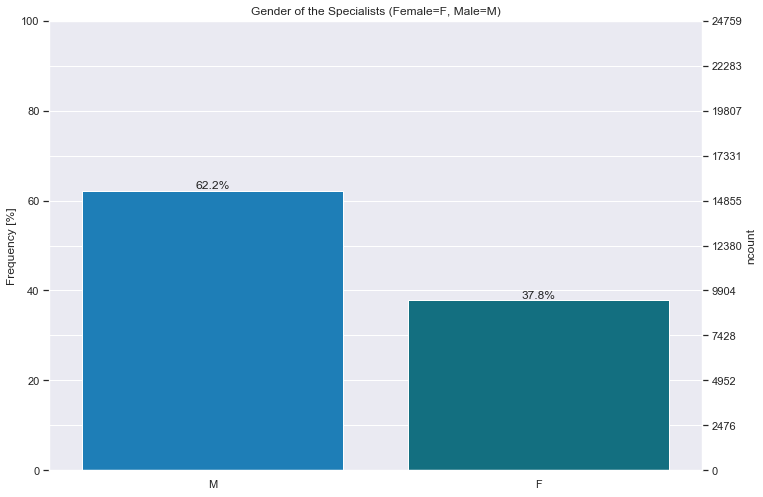

In [21]:
c_order = ['xkcd:cerulean', 'xkcd:ocean',
                'xkcd:black','xkcd:royal purple', 'xkcd:navy blue',
                'xkcd:powder blue', 'xkcd:light maroon', 
                'xkcd:lightish blue','xkcd:navy']
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax=sns.barplot(x=prescriber.Gender.value_counts().index, y=prescriber.Gender.value_counts(), palette=c_order)
ncount = len(prescriber)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
ax.set_ylabel('ncount')


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('Gender of the Specialists (Female=F, Male=M)')

# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

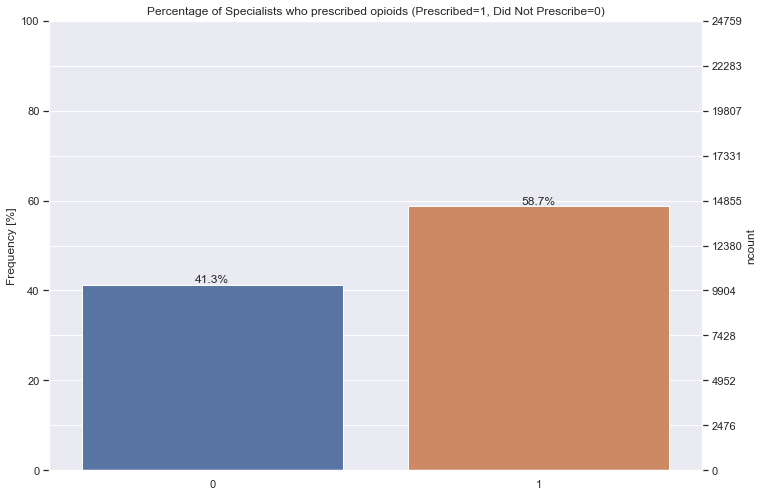

In [22]:
df = prescriber.drop_duplicates(subset=['NPI'], keep='first')
ax=sns.barplot(x=prescriber['Opioid.Prescriber'].value_counts().index, y=prescriber['Opioid.Prescriber'].value_counts())
ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
ax.set_ylabel('ncount')


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('Percentage of Specialists who prescribed opioids (Prescribed=1, Did Not Prescribe=0)')

# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

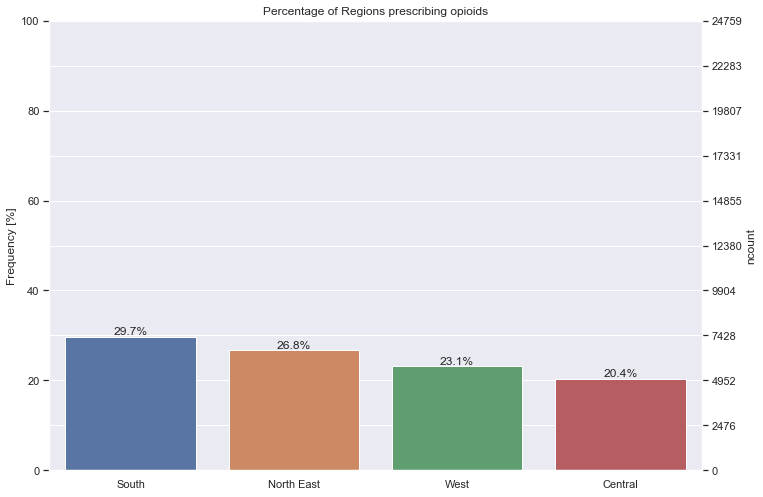

In [20]:
df = prescriber.drop_duplicates(subset=['NPI'], keep='first')
ax=sns.barplot(x=prescriber['Region'].value_counts().index, y=prescriber['Region'].value_counts())
ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
ax.set_ylabel('ncount')


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('Percentage of Regions prescribing opioids')

# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

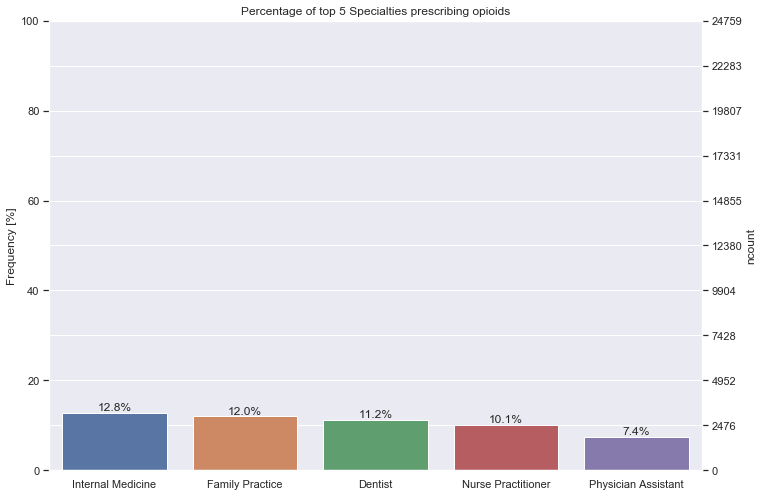

In [19]:
df = prescriber.drop_duplicates(subset=['NPI'], keep='first')

ax=sns.barplot(x=prescriber['Specialty'].value_counts().head(5).index, y=prescriber['Specialty'].value_counts().head(5))
ncount = len(df)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency [%]')
ax.set_ylabel('ncount')



for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax.set_title('Percentage of top 5 Specialties prescribing opioids')

# And use a MultipleLocator to ensure a tick spacing of 20
ax2.yaxis.set_major_locator(ticker.MultipleLocator(20))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

# Frequentism

In [14]:
TotPresc_mean = np.mean(prescriber['TotPresc'])
print('mean: ', TotPresc_mean)

TotPresc_std = np.std(prescriber['TotPresc'])
print('std: ', TotPresc_std)

mean:  1371.2058645341087
std:  3097.550136884529


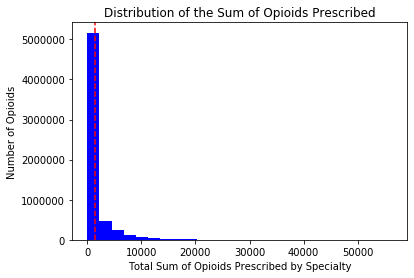

In [15]:
plt.hist(prescriber.TotPresc, bins=25, color='b')
plt.xlabel('Total Sum of Opioids Prescribed by Specialty')
plt.ylabel('Number of Opioids')
plt.title('Distribution of the Sum of Opioids Prescribed')
plt.axvline(TotPresc_mean, color='r', linestyle='--')

In [16]:
#Calculate t-value
thres = 12000
tam = len(prescriber.TotPresc) - 1
prob_tam = t.cdf(thres, tam, loc=TotPresc_mean, scale= TotPresc_std)
print('Probabilty value: ', prob_tam)

Probabilty value:  0.9996997109843182


In [17]:
cv_tam = t.ppf(0.975, tam)
print('Critical value: ', cv_tam)

Critical value:  1.9599643677981935


In [18]:
alpha = (1 - 0.975)
con_tam = t.interval(alpha, tam, loc= TotPresc_mean, scale = TotPresc_std)
print('Confidence intervals: ', con_tam)

Confidence intervals:  (1274.1348901094689, 1468.2768389587482)


In [59]:
opi_presc = prescriber.TotPresc.loc[prescriber['SumOpi'] >= 1]
non_opi_presc = prescriber.TotPresc.loc[prescriber['SumOpi'] == 0]

n1 = len(opi_presc)
n0 = len(non_opi_presc)
mean1 = np.mean(opi_presc)
mean0 = np.mean(opi_presc)
std1 = np.std(opi_presc)
std0= np.std(non_opi_presc)

print('Numer of Opioids Prescribed: ', n1)
print('Number of Specialists who did not prescribe opioids: ', n0)
print('Mean of Opioids Prescribed: ', mean1)
print('Standard Deviation of Opioids Prescribed: ', std1)

Numer of Opioids Prescribed:  12688
Number of Specialists who did not prescribe opioids:  12071
Mean of Opioids Prescribed:  2251.87736443884
Standard Deviation of Opioids Prescribed:  4018.82982476266


In [20]:
num = ((n1-1)*std1**2) + ((n0-1)*std0**2)
denom = (n1 + n0 -2)
sp = np.sqrt((num)/(denom))
print('Pooled std: ', sp)

Pooled std:  2963.0375159133796


In [21]:
t_test = (mean1 - mean0)/(sp * np.sqrt(((1/n1) + (1/n0))))
print('T-Test: ', t_test)

T-Test:  0.0


In [22]:
from scipy.stats import ttest_ind
ttest_ind(opi_presc, non_opi_presc, equal_var = True)

Ttest_indResult(statistic=758.1204948257559, pvalue=0.0)

In [23]:
ttest_ind(opi_presc, non_opi_presc, equal_var = False)

Ttest_indResult(statistic=774.9312534187718, pvalue=0.0)

# Bootstrapping

We'll create a bootstrap sampling to estimate a 95% confidence interval lower limit.

***Null Hypothesis:*** There isn't a difference in the standard diviation between the 2 groups (specialists prescribing opioids and specialists who didn't prescribe opioids)

***Alternate Hypothesis:*** There will be a differ in the standard diviation bwtween the 2 groups (specialists prescribing opioids and specialists who didn't prescribe opioids)

In [62]:
np.random.seed(47)
N_rep = 10000

bs_SumOpi = prescriber['SumOpi']
sample = np.random.choice(bs_SumOpi, size= N_rep)

In [63]:
bootstrap_replicate = np.mean(sample)
print(bootstrap_replicate)

87.4793


In [64]:
def bootstrap_replicate(data, func):
    bootstrap_sample = np.random.choice(data, len(data))
    return bootstrap_sample, func(bootstrap_sample)

bootstrap_replicate(bs_SumOpi, np.mean)

(array([ 0,  0, 26, ...,  0,  0,  0], dtype=int64), 83.27226463104326)

In [65]:
def bootstrap_replicate(data, func, size=1):
    bootstrap_sample = np.random.choice(data, len(data))
    return func(bootstrap_sample)

bootstrap_replicates= []

for i in range(N_rep):
    bs_rep = bootstrap_replicate(bs_SumOpi, np.mean)
    bootstrap_replicates.append(bs_rep)

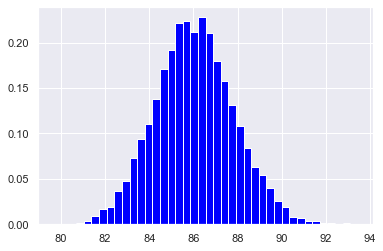

In [66]:
plot = plt.hist(bootstrap_replicates, bins=40, color='blue', density=True)
plt.show()

In [67]:
confidence_int = np.percentile(bootstrap_replicates, [2.5, 97.5])
print(confidence_int)

[82.63864857 89.66017509]


In [68]:
#Divide dataset into two groups (opioids/non opioid prescriptions)
opi_presc = prescriber.TotPresc.loc[prescriber['SumOpi'] >= 1]
non_opi_presc = prescriber.TotPresc.loc[prescriber['SumOpi'] == 0]

In [72]:
# Calculate standard deviation for opioid and non opioid prescriptions
std_sum = np.std(opi_presc)
std_non = np.std(non_opi_presc)

print('Standard Deviation of Opioid Prescriptions: ', std_sum)
print('Standard Deviation of Non Opioid Prescriptions: ', std_non)

Standard Deviation of Opioid Prescriptions:  4018.82982476266
Standard Deviation of Non Opioid Prescriptions:  1015.5814826596051


In [73]:
def bs_samp_std(data1, data2):
    bs_sample1 = np.random.choice(data1, len(data1))
    bs_sample2 = np.random.choice(data2, len(data2))
    std_diff = np.std(bs_sample1) - np.std(bs_sample2)
    return std_diff

In [75]:
samples_std = [bs_samp_std(opi_presc, non_opi_presc) for i in range(N_rep)]

print('Difference of STD for opioid and non opioid prescriptions: ', std1 - std0)
print ('Difference of STD for bootstrap samples: ', np.mean(samples_std))
print('The 95% confidence interval for the difference between the standard deviations\
 of opioid and non opioid prescriptions is: ',np.percentile(samples_std,[2.5,97.5]))

Difference of STD for opioid and non opioid prescriptions:  3003.2483421030547
Difference of STD for bootstrap samples:  3001.9541286285707
The 95% confidence interval for the difference between the standard deviations of opioid and non opioid prescriptions is:  [2828.20240397 3179.83659387]


Text(0, 0.5, 'Frequency')

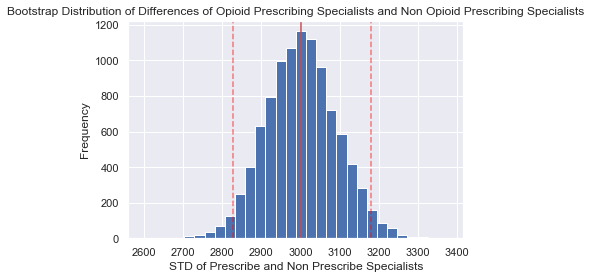

In [76]:
plt.hist(samples_std, bins=30, color='b')

plt.axvline(np.mean(samples_std), color='r', linestyle= '-')
plt.axvline(np.percentile(samples_std,(2.5)),  color='red', linestyle='--', alpha=0.5)
plt.axvline(np.percentile(samples_std,(97.5)), color='red', linestyle='--', alpha=0.5)

plt.title('Bootstrap Distribution of Differences of Opioid Prescribing Specialists and Non Opioid Prescribing Specialists')
plt.xlabel('STD of Prescribe and Non Prescribe Specialists')
plt.ylabel('Frequency')

The observed difference of standard deviations falls within the 95% Confidence Interval

# Confidence interval and p-value

We'll perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between opioid prescribing specialits and non-opioid prescribing specialits.

In [77]:
bs_perm_rep = np.empty(N_rep)
diff_means = np.mean(opi_presc) - np.mean(non_opi_presc)

In [78]:
#Define a function to generate a permutation sample from two data sets (insured and uninsured)
def permutation_sample(data1, data2):

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [79]:
def draw_perm_reps(data_1, data_2, func, size=1):
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [80]:
def diff_of_means(data_1, data_2):
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

# Compute difference of mean insured and uninsured: empirical_diff_means
empirical_diff_means = diff_of_means(opi_presc, non_opi_presc)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(opi_presc, non_opi_presc, diff_of_means, size=N_rep)

# Compute permutation p-value: perm_p
perm_p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

#Compute p-value: p
p = np.sum(bs_perm_rep >= diff_means)/len(bs_perm_rep)


print('Perm p-value = ', perm_p)
print('P-value= ', p)

Perm p-value =  0.0
P-value=  0.4813


***Null hypothesis:*** There isn't a difference in the mean charges between the 2 groups (specialists prescribing opioids and specialists who didn't prescribe opioids)

***Alternate hypothesis:*** There will be a difference in the mean charges between the 2 groups (specialists prescribing opioids and specialists who didn't prescribe opioids)

With the p-value from the bootstrap being 0.4813, I can reject the alternate hypothesis and accept the null hypothesis

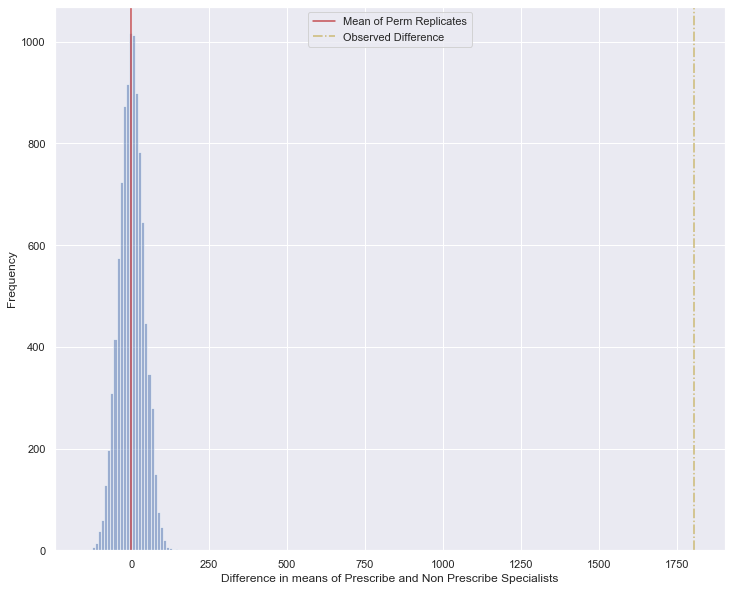

In [84]:
plt.figure(figsize=(12,10))
plt.hist(perm_replicates, alpha = 0.5, bins=30, color='b')
plt.axvline(np.mean(perm_replicates), color='r', linestyle='-', label='Mean of Perm Replicates')
plt.axvline(np.mean(diff_means), linestyle="-.", color='y', label='Observed Difference')
plt.xlabel('Difference in means of Prescribe and Non Prescribe Specialists')
plt.ylabel('Frequency')
plt.legend(loc = 'upper center')
plt.show()

# Bayesian Inference

In [172]:
opi_presc = prescriber.TotPresc.loc[prescriber['Opioid.Prescriber'] == 1]
non_opi_presc = prescriber.TotPresc.loc[prescriber['SumOpi'] == 0]
n1 = len(opi_presc)
n0 = len(non_opi_presc)

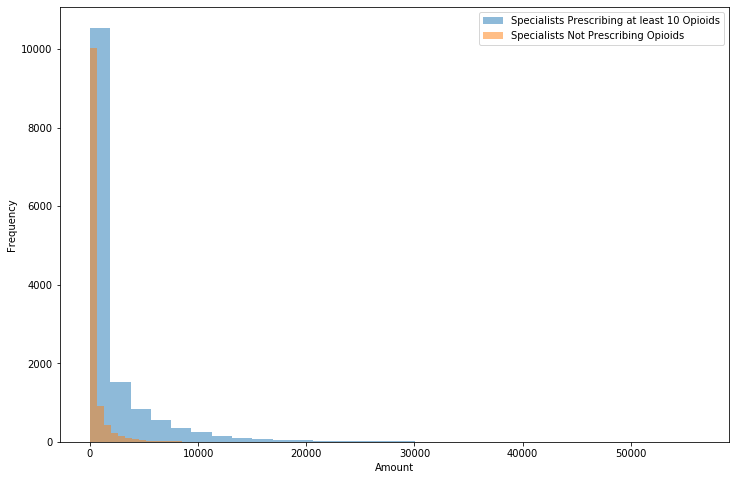

In [173]:
_ = plt.figure(figsize=(12,8))
_ = plt.hist(opi_presc, bins=30, alpha=0.5, label='Specialists Prescribing at least 10 Opioids')
_ = plt.hist(non_opi_presc, bins=30, alpha=0.5, label='Specialists Not Prescribing Opioids')
_ = plt.xlabel('Amount')
_ = plt.ylabel('Frequency')
_ = plt.legend()

## Initial parameter estimation

In [174]:
alpha_est = np.mean(non_opi_presc)**2 / np.var(non_opi_presc)
beta_est = np.var(non_opi_presc) / np.mean(non_opi_presc)
alpha_est, beta_est

(0.1924437921798787, 2315.0630348832274)

### Initial simulation

Let's draw the same number of random variates from this distribution and compare to our observed data

In [175]:
seed(47)
no_ins_model_rvs = t(alpha_est, scale=beta_est).rvs(n0)

In [176]:
# PyMC3 Gamma seems to use rate = 1/beta
rate_est = 1/beta_est
# Initial parameter estimates we'll use below
alpha_est, rate_est

(0.1924437921798787, 0.00043195368114477297)

## Creating a PyMC3 Model

In [124]:
with pm.Model() as model:
    alpha_ = pm.Exponential('alpha', 1/alpha_est)
    rate_ = pm.Exponential('rate', 1/rate_est)
    prescribed_opioids = pm.Gamma('Specialists Prescribing Opioids', alpha= alpha_, beta= rate_, observed = opi_presc)
    trace= pm.sample(1000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [rate, alpha]
Sampling 2 chains, 0 divergences: 100%|██████████| 6000/6000 [5:27:42<00:00,  3.28s/draws]  


In [125]:
alpha_samples = trace['alpha']
rate_samples = trace['rate']
beta_samples = 1/ rate_samples

In [126]:
alpha_ci = np.percentile(alpha_samples, [2.5,97.5])
rate_ci = np.percentile(rate_samples, [2.5, 97.5])

In [127]:
print(alpha_ci)
print(rate_ci)

[0.40736891 0.42284083]
[0.00019885 0.00021156]


Text(0.5, 1.0, '$\\beta$ Trace Plot')

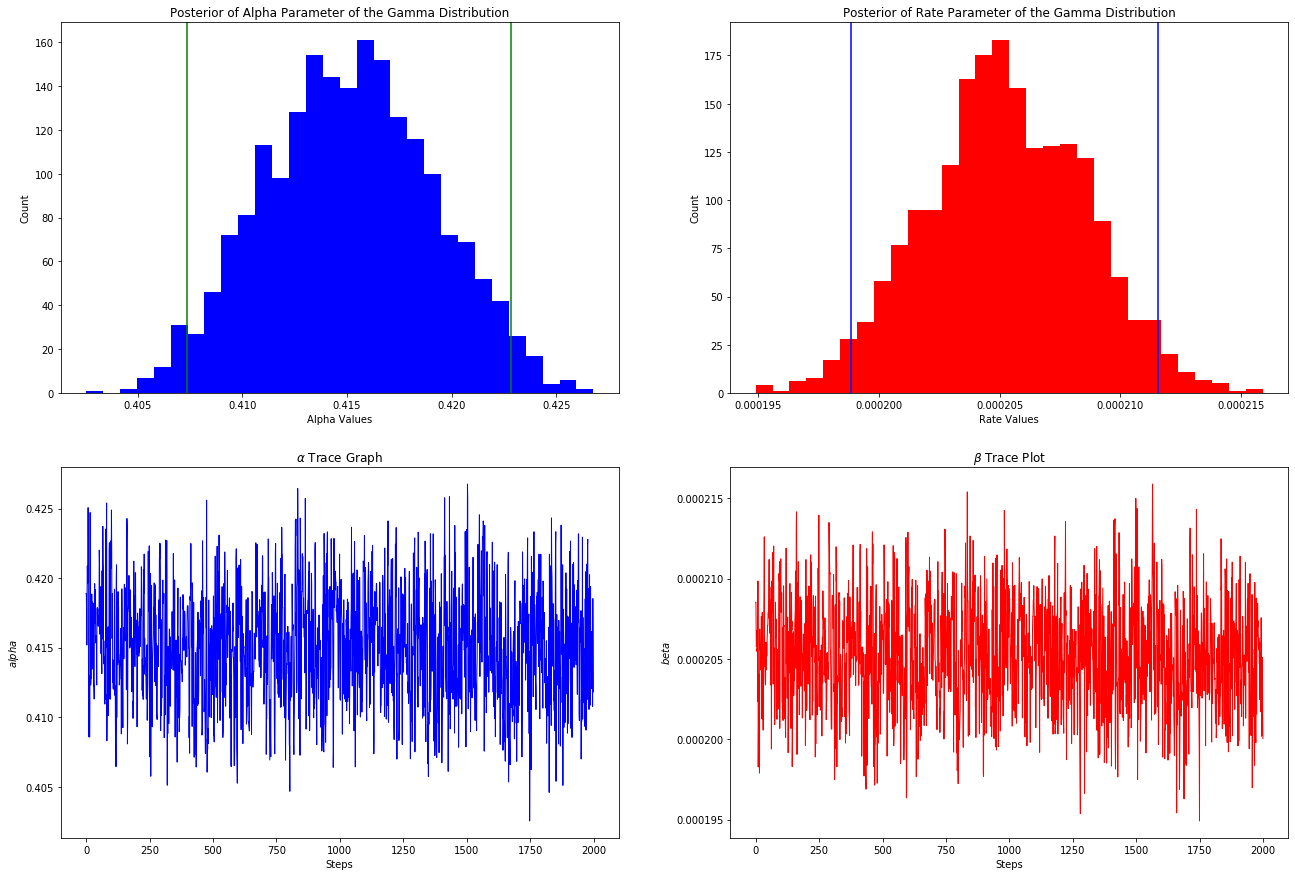

In [177]:
plt.figure(figsize=(22,15))
plt.subplot(2,2,1)
plt.hist(alpha_samples, bins = 30, histtype='stepfilled', color = 'b')
plt.axvline(alpha_ci[0], color = 'g')
plt.axvline(alpha_ci[1], color = 'g')
plt.xlabel('Alpha Values')
plt.ylabel('Count')
plt.title('Posterior of Alpha Parameter of the Gamma Distribution')

plt.subplot(2,2,2)
plt.hist(rate_samples, bins = 30, histtype='stepfilled', color= 'r')
plt.axvline(rate_ci[0], color = 'b')
plt.axvline(rate_ci[1], color = 'b')
plt.xlabel('Rate Values')
plt.ylabel('Count')
plt.title('Posterior of Rate Parameter of the Gamma Distribution')

plt.subplot(2,2,3)
plt.plot(alpha_samples, lw = 1, color='b')
plt.xlabel('Steps')
plt.ylabel(r'$alpha$')
plt.title(r'$\alpha$ Trace Graph')

plt.subplot(2,2,4)
plt.plot(rate_samples, lw = 1, color='r')
plt.xlabel('Steps')
plt.ylabel(r'$beta$')
plt.title(r'$\beta$ Trace Plot')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0001D6448>],
      dtype=object)

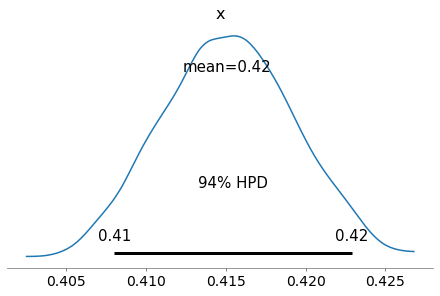

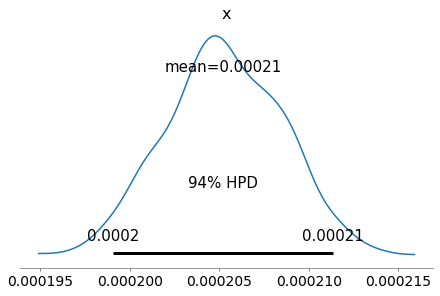

In [129]:
pm.plot_posterior(data=trace['alpha'])
pm.plot_posterior(data=trace['rate'])

C:\Users\Jimsyd\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\Jimsyd\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


NameError: name 'axes' is not defined

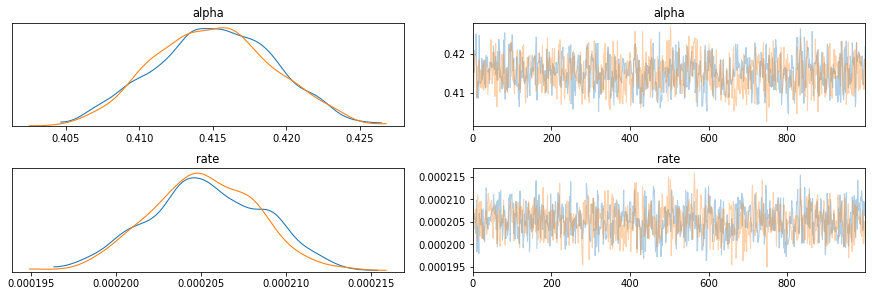

In [130]:
pm.traceplot(trace)
axes[0,0].plot(alpha_samples, rate_samples, 'r', lw=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F049F58C08>,
      dtype=object)

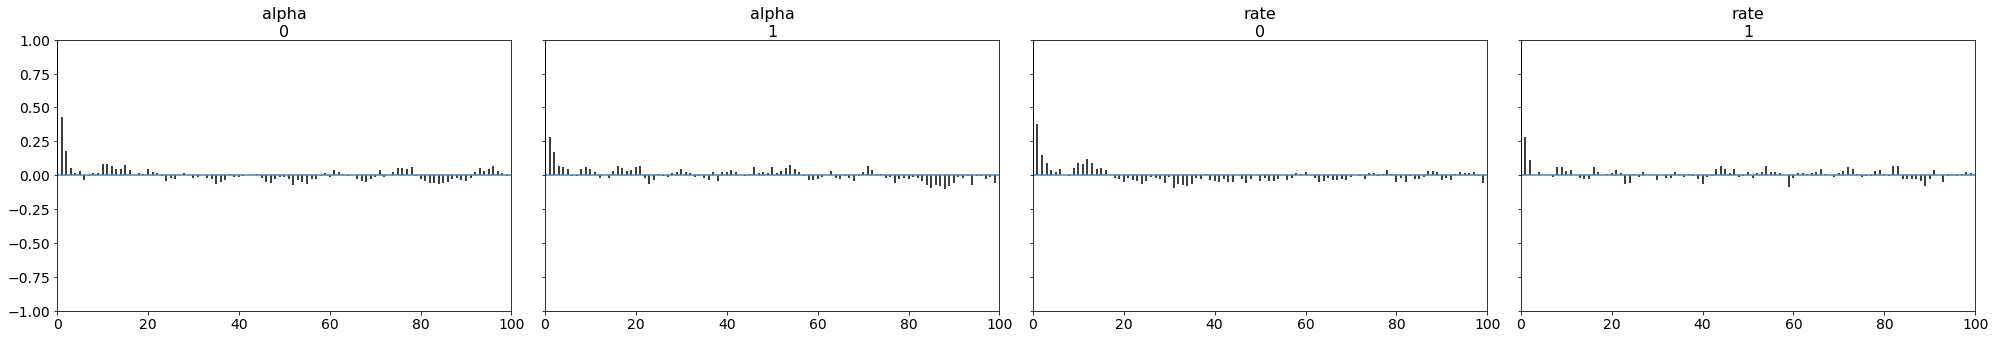

In [131]:
pm.plots.autocorrplot(trace)

# Statistics Visualizations

In [23]:
pdata = prescriber.query('Region == ["South", "North East", "West", "Central"]')

In [24]:
size = 2e-1 * pdata.SumOpi

colors = pdata.Region.map({'South':'gold', 'North East':'coral', 'West': 'palegreen', 'Central': 'skyblue'})

def plotdata():
    pdata.plot.scatter('SumOpi', 'TotPresc', c=colors, s=size, linewidths=0.5,edgecolor='k',alpha=0.5)

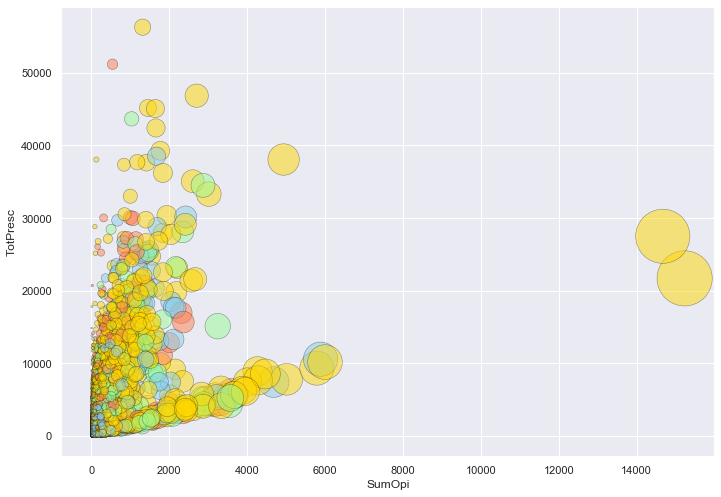

In [25]:
plotdata()

In [26]:
model = smf.ols(formula='SumOpi ~ 1',data=pdata)

In [27]:
grandmean = model.fit()
grandmean

In [28]:
def plotfit(fit):
    plotdata()
    plt.scatter(pdata.TotPresc, fit.predict(pdata),
              s=30, linewidths=0.5, edgecolor='k', marker='D',  c=colors)

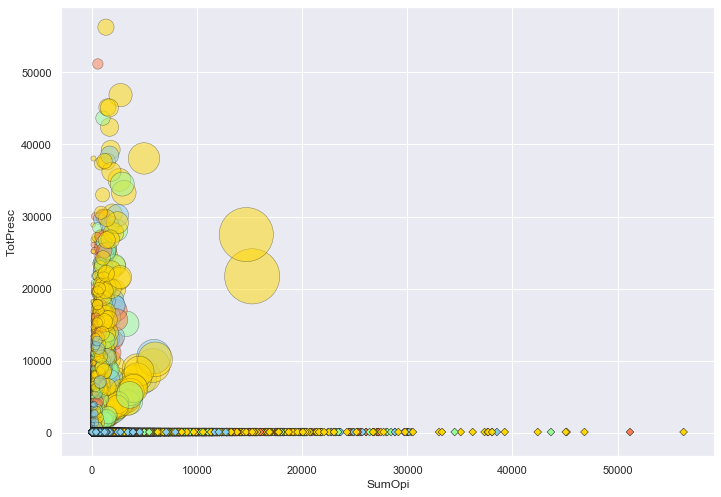

In [29]:
plotfit(grandmean)

In [30]:
grandmean.params

Intercept    86.028757
dtype: float64

In [31]:
pdata.SumOpi.mean()

86.02875721959691

In [32]:
groupmeans = smf.ols(formula='TotPresc ~ 1 + Region', data=pdata).fit()

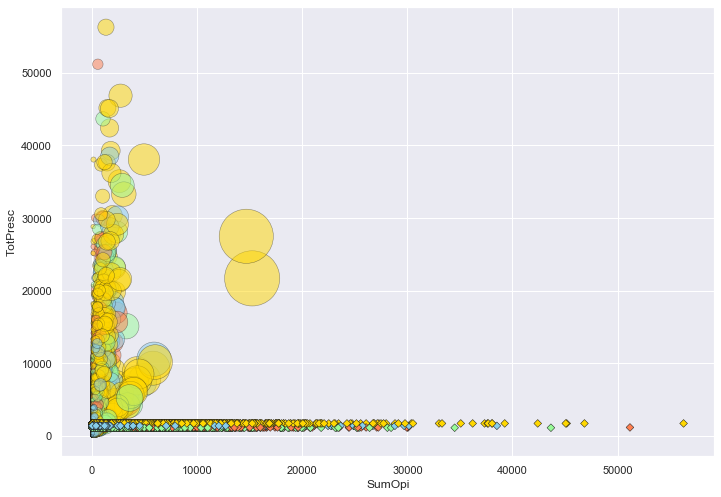

In [33]:
plotfit(groupmeans)

In [34]:
groupmeans.params

Intercept               1393.757330
Region[T.North East]    -221.589455
Region[T.South]          329.443703
Region[T.West]          -264.268848
dtype: float64

In [35]:
groupmeans = smf.ols(formula='TotPresc ~ -1 + Region', data=pdata).fit()

In [36]:
groupmeans.params

Region[Central]       1393.757330
Region[North East]    1172.167874
Region[South]         1723.201033
Region[West]          1129.488482
dtype: float64

In [37]:
pdata.groupby('Region').SumOpi.mean()

Region
Central        89.264857
North East     56.429197
South         114.474378
West           80.872949
Name: SumOpi, dtype: float64

In [38]:
prescribing = smf.ols(formula='TotPresc ~ -1 + Region + SumOpi', data=pdata).fit()

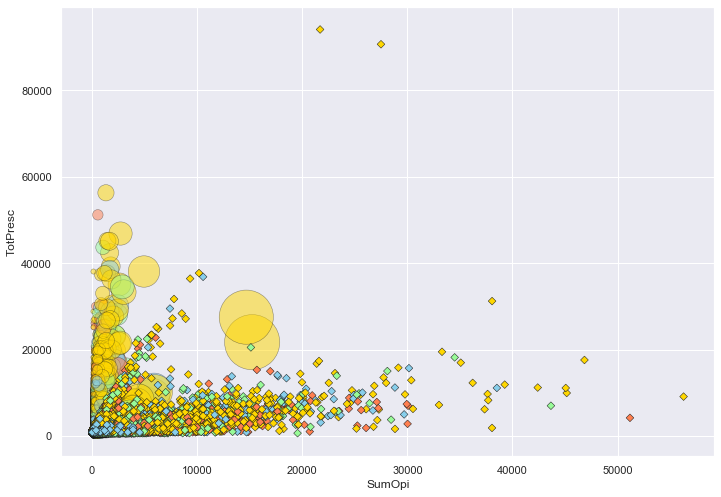

In [39]:
plotfit(prescribing)

In [40]:
prescribing.params

Region[Central]        848.454234
Region[North East]     827.451974
Region[South]         1023.897471
Region[West]           635.450056
SumOpi                   6.108822
dtype: float64

In [41]:
prescribing_by_region = smf.ols(formula='TotPresc ~-1 + Region + SumOpi', data=pdata).fit()

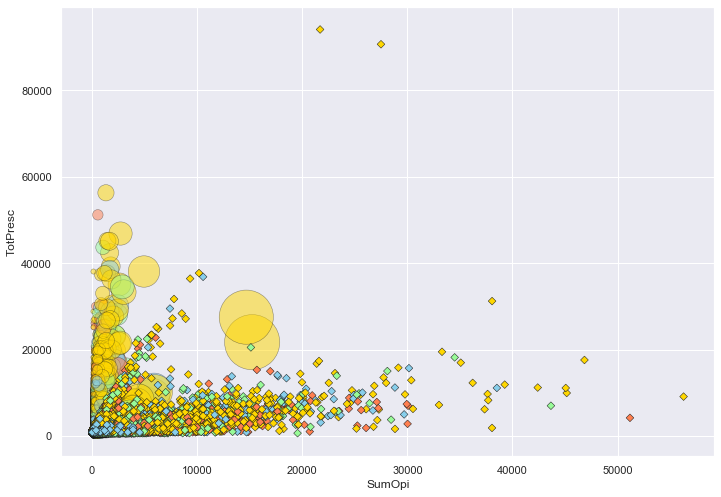

In [42]:
plotfit(prescribing_by_region)

In [43]:
prescribing_by_region.params

Region[Central]        848.454234
Region[North East]     827.451974
Region[South]         1023.897471
Region[West]           635.450056
SumOpi                   6.108822
dtype: float64

In [44]:
prescribing_by_region_population = smf.ols(formula='TotPresc ~ -1 + Region + SumOpi:Region + Population', data=pdata).fit()

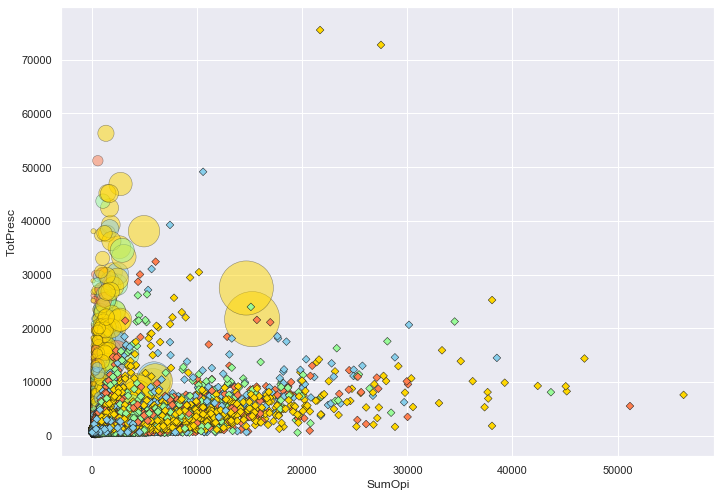

In [45]:
plotfit(prescribing_by_region_population)

# Visualizations of various specializations(Specialties, States, Gender)

In [49]:
def plotspecialist(Specialty):
    data = prescriber[prescriber.Specialty == Specialty]
    area= 1e-1 * data.TotPresc
        
    data.plot.scatter('SumOpi', 'TotPresc', s=area, linewidths=1, edgecolors='k', figsize=(12,9), c='gold')
    
    plt.xlabel('Sum of Specialists Prescribing Opioids')
    plt.ylabel('Total Prescriptions')
    plt.title('Opioid Prescribing Specialists by Specialty')

slider_special = wg.Dropdown(options=list(prescriber['Specialty'].unique()),disable=False)

wg.interact(plotspecialist, Specialty=slider_special)

interactive(children=(Dropdown(description='Specialty', options=('Dentist', 'Optometry', 'General Surgery', 'H…

<function __main__.plotspecialist(Specialty)>

In [50]:
vals = prescriber['Abbrev'].sort_values(ascending=True).unique()

In [51]:
def plotstates(Abbrev):
    data = prescriber[prescriber.Abbrev == Abbrev]
    area= 1e-1 * data.TotPresc
        
    data.plot.scatter('SumOpi', 'TotPresc', s=area, linewidths=1, edgecolors='k', figsize=(12,9), c='red')
    
    plt.xlabel('Sum of Specialists Prescribing Opioids')
    plt.ylabel('Total Prescriptions')
    plt.title('Opioid Prescribing Specialists by State')

slider_state = wg.Dropdown(options=vals, disable=True)

wg.interact(plotstates, Abbrev=slider_state)

interactive(children=(Dropdown(description='Abbrev', options=('AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', …

<function __main__.plotstates(Abbrev)>

In [52]:
def plotgender(Gender):
    data = prescriber[prescriber.Gender == Gender]
    area= 1e-2 * data.TotPresc
    
    
    data.plot.scatter('SumOpi', 'TotPresc', s=area, linewidths=1, edgecolors='k', figsize=(12,9), c='brown')
    
    plt.xlabel('Sum of Specialists Prescribing Opioids')
    plt.ylabel('Total Prescriptions')
    plt.title('Opioid Prescribing Specialists by Gender')

slider_gender = wg.Dropdown(options=list(prescriber['Gender'].unique()),disable=False)

wg.interact(plotgender, Gender=slider_gender)

interactive(children=(Dropdown(description='Gender', options=('M', 'F'), value='M'), Output()), _dom_classes=(…

<function __main__.plotgender(Gender)>

# Putting it all together to see the breakdown combination of (Gender, State and Specialty) prescribing Opioids

In [53]:
def plotall_SumOpi(Gender, Specialty, Abbrev):
    data = prescriber[(prescriber.Gender == Gender) & (prescriber.Specialty == Specialty) & (prescriber.Abbrev == Abbrev)]                      
    area= 2e-1 * data.TotPresc
        
    data.plot.scatter('SumOpi', 'TotPresc', s=area, linewidths=1, edgecolors='k', figsize=(12,9), c='c')
    
    plt.xlabel('Sum of Specialists Prescribing Opioids')
    plt.ylabel('Total prescriptions')
    plt.title('Opioid Prescribing Specialists')


wg.interactive(plotall_SumOpi, Specialty = slider_special, Abbrev = slider_state, Gender = slider_gender)

interactive(children=(Dropdown(description='Gender', options=('M', 'F'), value='M'), Dropdown(description='Spe…

# Putting it all together to see the breakdown combination of (Gender, State and Specialty) not prescribing Opioids

In [54]:
#Putting it all together to see the breakdown combination of (Gender, State and Specialty) not prescribing Opioids

def plotall_NonOpi(Gender, Specialty, Abbrev):
    data = prescriber[(prescriber.Gender == Gender) & (prescriber.Specialty == Specialty) & (prescriber.Abbrev == Abbrev)]                      
    area= 2e-1 * data.TotPresc
        
    data.plot.scatter('NonOpi', 'TotPresc', s=area, linewidths=1, edgecolors='k', figsize=(12,9), c='yellow')
    
    plt.xlabel('Sum of Non Opioids Prescribed')
    plt.ylabel('Total prescriptions')
    plt.title('Non Opioid Prescribing Specialists')

slider_gender = wg.Dropdown(options=list(prescriber['Gender'].unique()),disable=False)

wg.interactive(plotall_NonOpi, Specialty = slider_special, Abbrev = slider_state, Gender = slider_gender)

interactive(children=(Dropdown(description='Gender', options=('M', 'F'), value='M'), Dropdown(description='Spe…